## Libraries

In [218]:
import pandas as pd
import numpy as np
from statsmodels.regression.rolling import RollingOLS
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt, timedelta
from ipywidgets import IntProgress
from IPython.display import display

## Regression

First thing first we can start by computing the log-returns of the market (the SP500 index)

In [219]:
SP500=pd.read_csv('SP500_prices.csv', index_col=0)

In [220]:
SP500['logreturn']=0
SP500

,Date,Price,logreturn
0,2017-06-01,2430.06,0
1,2017-06-02,2439.07,0
2,2017-06-05,2436.10,0
3,2017-06-06,2429.33,0
4,2017-06-07,2433.14,0
...,...,...,...
1777,2024-06-25,5469.30,0
1778,2024-06-26,5477.90,0
1779,2024-06-27,5482.87,0
1780,2024-06-28,5460.48,0


In [221]:
warnings.filterwarnings('ignore')
for i in range(len(SP500)-1):
    SP500['logreturn'][i+1]=np.log(SP500['Price'][i+1]/SP500['Price'][i])

In [222]:
SP500.drop(index=0, inplace=True)

In [223]:
SP500

,Date,Price,logreturn
1,2017-06-02,2439.07,0.003701
2,2017-06-05,2436.10,-0.001218
3,2017-06-06,2429.33,-0.002783
4,2017-06-07,2433.14,0.001567
5,2017-06-08,2433.79,0.000267
...,...,...,...
1777,2024-06-25,5469.30,0.003926
1778,2024-06-26,5477.90,0.001571
1779,2024-06-27,5482.87,0.000907
1780,2024-06-28,5460.48,-0.004092


Now we can repeat the same thing for every stock we are considering, by copying the dataframe of prices of stocks and changing the values in each row with the log-returns

In [224]:
prices_of_stocks=pd.read_csv('prices_stocks_list.csv', index_col=0)

In [225]:
logreturns_stocks=prices_of_stocks

In [226]:
# list of stocks will be super useful in the future for the data structure chosen
list_of_stocks=list(prices_of_stocks.columns)
list_of_stocks.remove('Date')

In [227]:
logreturns_stocks.drop('Date', axis=1, inplace=True)

In [228]:
logreturns_stocks=logreturns_stocks.apply(lambda x: np.log(x / x.shift(1)))

In [229]:
logreturns_stocks

,A,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,ADP,...,WRK,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001316,0.009537,0.014711,0.008063,0.008640,0.003585,0.014744,-0.015939,0.009519,-0.023199,...,-0.003081,0.003744,0.000000,0.008126,0.003940,-0.014982,0.010622,0.002165,0.010300,-0.002237
2,-0.006765,0.004433,-0.009826,0.003858,0.002577,0.006658,0.000766,-0.027060,-0.006654,0.001188,...,-0.008200,-0.000884,-0.003887,-0.010450,-0.009984,0.007768,0.003766,0.002834,-0.000081,0.002716
3,-0.004979,0.000000,0.003373,0.005318,-0.005593,-0.001977,-0.003908,0.016997,0.000238,0.000989,...,-0.009745,-0.011353,0.000898,-0.005115,-0.006291,0.013513,-0.009632,0.001616,0.001935,0.004934
4,0.008780,0.022267,0.005939,0.012883,0.004305,0.001740,0.004116,0.014706,-0.000953,0.003076,...,0.029494,-0.000138,-0.002420,-0.002189,0.007544,-0.003701,0.014508,-0.000808,0.001448,0.004436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,-0.002891,-0.002692,0.004458,-0.011587,0.001803,-0.000130,0.005157,0.008195,-0.024109,-0.003215,...,-0.017375,-0.012729,-0.026519,-0.009019,-0.004456,0.002802,-0.010245,-0.012466,-0.002215,-0.022719
1778,-0.011950,-0.000899,0.019796,0.002340,-0.005799,-0.008336,0.003373,-0.010913,0.000330,-0.042686,...,-0.010209,0.002202,-0.011380,-0.001927,0.000930,0.000350,-0.005272,-0.002800,0.001203,0.017234
1779,-0.017356,0.014286,0.003978,-0.012701,-0.002195,-0.004705,0.033665,-0.005104,-0.000989,-0.003030,...,0.000805,0.001440,0.009256,0.011395,0.001115,0.004274,0.001321,0.004914,0.002494,0.032016
1780,-0.008985,0.004423,-0.016388,0.014860,-0.007096,0.000725,0.015931,0.006946,-0.002643,0.005840,...,0.010400,-0.003845,0.006006,0.004030,-0.008204,0.001913,-0.005588,-0.001132,0.001383,-0.017724


In [230]:
logreturns_stocks.drop(index=0, inplace=True)

Now we set the sample size window for the rolling regression and we initialize a column in the SP500 dataframe to a constant 1; this will allow us to get the values of alpha for each regression we do

In [231]:
sample_size=180
SP500['const'] = 1

Now the hard part: what we want to have every data accessible is not representable in a dataframe, or in any 2D data structure since we have 3 "axis" to account for: ticker, dates and values of interest (such as alpha, beta, rsquared, systematic risk, specific risk, total risk, alpha and beta significance). Hence we chose to create a dataframe for every ticker with dates as rows and columns as values of interest, and then we can store all the dataframes in a list of dataframes, which will not be printable but it will be ordered in alphabetical order, such that access to each stock ticker is easy.

To do so the best way is to append every dataframe; we then initialize the first dataframe (corresponding to the first stock ticker) in the cell below

In [232]:
# we initialize the list of dataframes as well
frameslist=[] 

# we use OLS for rolling regression
model = RollingOLS(endog=logreturns_stocks[list_of_stocks[0]].values , exog=SP500[['const','logreturn']], window=180)
res=model.fit()

# we create two arrays of pvalues given the structure of model.fit().pvalues (a list of lists)
pvalues_alpha = [sublist[0] for sublist in res.pvalues]
pvalues_beta= [sublist[1] for sublist in res.pvalues]

# we initialize the dataframe
frame=pd.DataFrame({
    list_of_stocks[0]: SP500['Date'][sample_size:len(SP500)], # first 180 days are lost
    'alpha': res.params['const'], # unfortunately the name ['const'] remains by the SP500 dataframe
    'beta': res.params['logreturn'],
    'rsquared': res.rsquared,
    'syst_risk': res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #from the formula of systematic risk
    'spec_risk': np.std(logreturns_stocks[list_of_stocks[0]].values 
                     - (res.params['const']+(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2, #from the definition of specific risk
    'total_risk': np.std(logreturns_stocks[list_of_stocks[0]].values 
                         - (res.params['const']+(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2 
    +res.params['logreturn']**2*np.std(SP500['logreturn'])**2, #from the sum of the two risks
    'alpha_sign' : pvalues_alpha,
    'beta_sign' : pvalues_beta
}) 
frame.drop(frame.index[0:sample_size], inplace=True) #we have to drop the first 180 rows given they are empty
frameslist.append(frame)
frameslist[0]

,A,alpha,beta,rsquared,syst_risk,spec_risk,total_risk,alpha_sign,beta_sign
181,2018-02-20,0.000180,1.209670,0.482291,0.000218,0.000173,0.000391,0.774297,6.048532e-38
182,2018-02-21,0.000264,1.201667,0.479098,0.000215,0.000173,0.000389,0.673998,1.745867e-37
183,2018-02-22,0.000223,1.200412,0.476525,0.000215,0.000173,0.000388,0.723672,4.063611e-37
184,2018-02-23,0.000104,1.164340,0.462567,0.000202,0.000173,0.000375,0.870246,3.456959e-35
185,2018-02-26,0.000080,1.143575,0.454124,0.000195,0.000173,0.000368,0.900455,4.553288e-34
...,...,...,...,...,...,...,...,...,...
1777,2024-06-25,-0.000405,1.100478,0.178517,0.000181,0.000173,0.000354,0.749971,4.989916e-10
1778,2024-06-26,-0.000438,1.111816,0.179515,0.000184,0.000173,0.000358,0.729682,4.359528e-10
1779,2024-06-27,-0.000535,1.113069,0.178498,0.000185,0.000173,0.000358,0.673854,5.002472e-10
1780,2024-06-28,-0.000623,1.109766,0.178282,0.000184,0.000173,0.000357,0.623239,5.150984e-10


Notice that all "risk" columns are variances and NOT std.devs, this has to be accounted for but at the moment it is useful since:

a) Summation for the total risk is easier

b) Both the square root and the y=x^2 parabula are monotonic increasing functions and hence will not disturb the sorting order of portfolios below

In [233]:
# rinse and repeat for every stock left
warnings.filterwarnings('ignore')

#the next 4 lines are there just for the program to display a progress bar
max_count=len(list_of_stocks)
f = IntProgress(min=0, max=max_count)
print('You can see progress here:')
display(f)


for ticker in list_of_stocks:
    model = RollingOLS(endog=logreturns_stocks[ticker].values , exog=SP500[['const','logreturn']], window=180)
    res=model.fit()
    pvalues_alpha = [sublist[0] for sublist in res.pvalues]
    pvalues_beta= [sublist[1] for sublist in res.pvalues]
    frame=pd.DataFrame({
        ticker: SP500['Date'][sample_size:len(SP500)],
        'alpha': res.params['const'],
        'beta': res.params['logreturn'],
        'rsquared': res.rsquared,
        'syst_risk': res.params['logreturn']**2*np.std(SP500['logreturn'])**2, 
        'spec_risk': np.std(logreturns_stocks[ticker].values 
                     - (res.params['const']
                        +(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2, 
        'total_risk': np.std(logreturns_stocks[ticker].values 
                         - (res.params['const']
                            +(np.array(res.params['logreturn'])*np.array(SP500['logreturn']))))**2
        +res.params['logreturn']**2*np.std(SP500['logreturn'])**2, 
        'alpha_sign' : pvalues_alpha, 
        'beta_sign' : pvalues_beta
    }) 
    frame.drop(frame.index[0:sample_size], inplace=True)
    if ticker!=list_of_stocks[0]: #this is here just as a check to not append twice the first stock dataframe
        frameslist.append(frame)
    f.value += 1 #this too is useful for the progress bar
    
    
print('Done!')

You can see progress here:


IntProgress(value=0, max=388)

Done!


## Creation of tilted portfolios

### Portfolio 1: Rsquared

Tilting by rsquared is interesting because it allows us to choose a subset of stocks that are in a sense "a good fit" for the market model rolling regression. Hence we know all parameters will be "good" because of this. Choosing the stocks is fairly simple: we have a time series of rsquared values for each stock for each unique (but overlapping) window of 180 days; we can just average the rsquared since each window has an equal significance to the one prior to find an average of the rsquared over a period of 7 years for that specific stock

In [19]:
average_rsquared=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    average_rsquared=pd.concat([average_rsquared,  # for each row we have a ticker and its average rsquared value 
                                pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['rsquared'].values)}.items())])

In [20]:
average_rsquared.reset_index(inplace=True)

In [21]:
average_rsquared.drop('index', axis=1, inplace=True)

In [22]:
average_rsquared.sort_values(by=1, ascending=False, inplace=True)

In [239]:
average_rsquared.rename(columns={0: 'ticker', 1: 'average_rsquared'}, inplace=True)

In [240]:
average_rsquared[average_rsquared['average_rsquared']>=0.5]

,ticker,average_rsquared
252,MSFT,0.643110
32,APH,0.630847
54,BLK,0.624456
343,TROW,0.600666
5,ACN,0.598335
2,AAPL,0.583924
26,AMP,0.581016
228,MA,0.575559
56,BRK-B,0.574219
24,AME,0.572819


As an example the tickers above are ones of stocks with an average rsquared value of over 0.5

### Portfolio 2: alpha 

Deciding how to assign a single value of alpha instead of a time series of alphas given by the rolling regressions is not easy, since blindly averaging could lead to problems: mainly due the fact that the alpha of a single stock can and will vary over time and will be influenced by a series of real world factors too. Some solutions to this problem include clustering around different values of alpha (an example could be using gaussian mixture models to determine significant values of alpha per each stock), or using a weighted average (with weights that can be based on significance or goodness of the fit). Given clustering techniques would not be definitive (they still could spit out many different values of alpha), and that using an average of alpha with weights emphasising the goodness of the fit would retrace essentially the steps of portfolio 1, we chose to use a weighted average with as weights the inverse of the alpha_significance (pvalues for each value of alpha). This way we weigh more alpha values that are more significant and less alpha values that are less significant. 

This approach will be repeated for the same reasons in transforming the beta time series in a single value

In [241]:
alphas_by_sign=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    alphas_by_sign=pd.concat([alphas_by_sign, 
                              pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['alpha'].to_numpy(), 
                                                                          weights=(1/(frameslist[i]['alpha_sign']).to_numpy()))}.items())])

In [242]:
alphas_by_sign.reset_index(inplace=True)

In [243]:
alphas_by_sign.drop('index', axis=1, inplace=True)

In [244]:
alphas_by_sign.sort_values(by=1, ascending=False, inplace=True)

In [245]:
alphas_by_sign.rename(columns={0: 'ticker', 1: 'average_alpha'}, inplace=True)

In [246]:
alphas_by_sign

,ticker,average_alpha
342,TPR,0.003352
269,NVDA,0.003311
264,NRG,0.003035
102,DE,0.002788
234,MCK,0.002770
...,...,...
374,WFC,-0.002948
13,AES,-0.003345
300,PYPL,-0.003362
19,ALB,-0.003366


Note that while these values of alpha might seem small they are not in the usual unit of measurement, since they were spat out by a rolling regression; hence they represent an "alpha of daily log returns", in the unit of measurement sense, and hence it makes sense they are small. Still we see some notable examples up in the top of the dataframe such as NVIDIA

### Portfolio 3 and 4: betas

Computing betas is super useful because it essentially allows us to compute systematic risk, given that the market risk is constant (in the sense it is not a time series from rolling regressions). This will give us 2 portfolios because the tilting will happen both in high risk and low risk

In [264]:
syst_risk_by_sign=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    syst_risk_by_sign=pd.concat([syst_risk_by_sign,
                              pd.DataFrame({list_of_stocks[i]: np.average(frameslist[i]['beta'].to_numpy()**2, #note betas have to be squared because of the formula for systematic risk
                                                                          weights=(1/(frameslist[i]['beta_sign']).to_numpy()))}.items())])

In [265]:
syst_risk_by_sign.reset_index(inplace=True)

In [266]:
syst_risk_by_sign.drop('index', axis=1, inplace=True)

Now comes a problem. Some values of the beta significance are so significant the computer essentially approximates them to 0. This means we could have NaN values in our dataframe, given we divide by those values:

In [267]:
syst_risk_by_sign[syst_risk_by_sign[1].isna()]

,0,1
26,AMP,NaN
56,BRK-B,NaN
60,C,NaN
158,GL,NaN
238,MET,NaN


We can fix this by simply "keeping track" of those values' indexes and we replace the weighted average with a simple average of those values per each stock where the significance is exactly zero. The rationale behind this is that if in a weighted average we have say in total n weights and k weights that tend to infinity (approximately in the same manner) then essentilaly the numerator of the weighted average is just the same of those k values multiplied a constant (the weight) that is infinitely increasing. The other n-k values become approximations that, as the weight increases, decrease their contributions and they become irrelevant, and at the end what we are left with is just a simple arithmetic average between those values having weights that increase to infinity

In [268]:
index_of_nans=syst_risk_by_sign[syst_risk_by_sign[1].isna()].index.tolist()

In [269]:
index_of_nans

[26, 56, 60, 158, 238]

In [270]:
for value in index_of_nans:
    beta=np.average(frameslist[value][frameslist[value]['beta_sign']==0]['beta'].to_numpy()**2)
    syst_risk_by_sign[1][value]=beta

Now we multiply by the variance of market returns:

In [271]:
syst_risk_by_sign[1]=syst_risk_by_sign[1]*(np.std(SP500['logreturn'])**2)

In [272]:
syst_risk_by_sign.rename(columns={0: 'ticker', 1: 'average_systematic_risk'}, inplace=True)

In [273]:
syst_risk_by_sign

,ticker,average_systematic_risk
0,A,0.000126
1,AAL,0.000425
2,AAPL,0.000191
3,ABBV,0.000093
4,ABT,0.000110
...,...,...
383,XOM,0.000164
384,XYL,0.000188
385,YUM,0.000213
386,ZBH,0.000163


Note we are not sorting values as usual; this is because it will be simpler to compute total risk dataframe if we do not sort

### Portfolio 5 and 6: specific risk

Since specific risk is given by the standard deviation of residuals, we do not have a time series of values as before. Hence we can just take one of the values per each stock (we chose the last one)

In [274]:
spec_risk=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    spec_risk=pd.concat([spec_risk, 
                         pd.DataFrame({list_of_stocks[i]: 
                                                  frameslist[i]['spec_risk'][len(logreturns_stocks)]}.items())])

In [275]:
spec_risk.reset_index(inplace=True)

In [276]:
spec_risk.drop('index', axis=1, inplace=True)

In [277]:
spec_risk.rename(columns={0: 'ticker', 1: 'average_specific_risk'}, inplace=True)

In [278]:
spec_risk

,ticker,average_specific_risk
0,A,0.000173
1,AAL,0.000946
2,AAPL,0.000144
3,ABBV,0.000200
4,ABT,0.000137
...,...,...
383,XOM,0.000265
384,XYL,0.000165
385,YUM,0.000133
386,ZBH,0.000214


Here too we do not sort

### Portfolio 7 and 8: total risk

Total risk is easily constructed by the simple sum of the two systematic and specific risk; the simple sum suffices given we have not converted risks in standard deviation but we had kept them in variances and moreover the two dataframes are not sorted, hence we can sum row by row

In [279]:
total_risk=pd.DataFrame({})
for i in range(len(list_of_stocks)):
    total_risk=pd.concat([total_risk, 
                         pd.DataFrame({list_of_stocks[i]: 
                                       syst_risk_by_sign['average_systematic_risk'][i]+
                                       spec_risk['average_specific_risk'][i]}.items())])

In [280]:
total_risk.reset_index(inplace=True)

In [281]:
total_risk.drop('index', axis=1, inplace=True)

In [283]:
total_risk.rename(columns={0: 'ticker', 1: 'average_total_risk'}, inplace=True)

We can now sort values to help with the tilting for all risk-based portfolios; we do not have to change the values from variances to stddevs since as we said before both square root and parabula are increasingly monotonic functions

In [284]:
syst_risk_by_sign.sort_values('average_systematic_risk', ascending=False, inplace=True)

In [285]:
spec_risk.sort_values('average_specific_risk', ascending=False, inplace=True)

In [286]:
total_risk.sort_values('average_total_risk', ascending=False, inplace=True)

At last we create the portfolios, using head and tail and selecting only top/bottom 10%

In [291]:
percentile=int(np.floor(0.1*len(list_of_stocks)))

In [292]:
highest_alpha=alphas_by_sign.head(percentile)

In [293]:
highest_alpha.reset_index(inplace=True)

In [288]:
highest_rsquared=average_rsquared.head(percentile)

In [289]:
highest_rsquared=highest_rsquared[highest_rsquared['average_rsquared']>=0.5]

In [290]:
highest_rsquared.reset_index(inplace=True)

In [296]:
high_systematic_risk=syst_risk_by_sign.head(percentile)

In [297]:
high_systematic_risk.reset_index(inplace=True)

In [294]:
low_systematic_risk=syst_risk_by_sign.tail(percentile)

In [295]:
low_systematic_risk.reset_index(inplace=True)

In [298]:
low_specific_risk=spec_risk.tail(percentile)

In [299]:
low_specific_risk.reset_index(inplace=True)

In [300]:
high_specific_risk=spec_risk.head(percentile)

In [301]:
high_specific_risk.reset_index(inplace=True)

In [302]:
high_total_risk=total_risk.head(percentile)

In [303]:
high_total_risk.reset_index(inplace=True)

In [304]:
low_total_risk=total_risk.tail(percentile)

In [305]:
low_total_risk.reset_index(inplace=True)

## Rebalancing Portfolios

To rebelance properly the portfolio, two key insights are neede: first, the fact that every stored day across any of our dataframe is a valid trading day, since it has an associated price; we do not have to worry about holidays and so on. Second, it is important to notice we are only interested in the value of our portfolios over time per each day effectively to compute returns and other metrics. 

Given the first insight, we decided to rebalance not every "week" but every 5 trading days. This is mainly to have some consistency across our rebalancing period: rebalancing every 5 trading days does not care about holidays, rebalancing say every tuesday instead could mean a trading period of anywhere between 1 and 10 trading days, depending on holidays. The number 5 was chosen because in a typical week there are 5 trading days and 2 days of market closed

Now we have to rebalance every portfolio, starting from value of 100 and saving value of portfolio per each day. Remember all prices saved in prices_of_stocks dataframe are adjusted closing prices, hence we do not need to worry about daily fluctuations and stock splits. 

The rationale for rebalance is simple: we start with a value of a 100, we initialise the portfolio "buying" an equal amount of stocks per each portfolio; we also keep track of the quantity we bought of any stock. Note we allow for fractional quantities and not integer for 3 reasons: easier calculations, independence from starting value (main one) and the novelty of brokers allowing fractional shares lately. 

Then after a week we mark down the new value of our portfolio (akin to selling everything) by multiplying old quantity and new price of various assets. We then buy everything again according to our equal percentage amount and we note down the new quantity; then we repeat these steps. 

Also, note that the value of the portfolio is computed daily while the "selling" and "buying again" part only every 5 days

In [306]:
i=0
portfoliovalue_alpha=[]
portfoliovalue_first=100

# initialise a weight dict
weight_dict={ticker: 1/len(highest_alpha) for ticker in highest_alpha['ticker'].values}

# thanks to weights and initial value compute quantity dict
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in highest_alpha['ticker'].values}

while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in highest_alpha['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] # new portfolio value summing over tickers
    portfoliovalue_alpha.append(value)
    
    # if we hit 5 days we rebalance:
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_alpha[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in highest_alpha['ticker'].values} # updating quantity

Rinse and repeat for every portfolio

In [307]:
i=0
portfoliovalue_rsquared=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(highest_rsquared) for ticker in highest_rsquared['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in highest_rsquared['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in highest_rsquared['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] 
    portfoliovalue_rsquared.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_rsquared[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in highest_rsquared['ticker'].values}

In [308]:
i=0
portfoliovalue_lowsyst=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(low_systematic_risk) for ticker in low_systematic_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_systematic_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in low_systematic_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] 
    portfoliovalue_lowsyst.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowsyst[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_systematic_risk['ticker'].values}

In [309]:
i=0
portfoliovalue_topsyst=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(high_systematic_risk) for ticker in high_systematic_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in high_systematic_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in high_systematic_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i]
    portfoliovalue_topsyst.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_topsyst[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in high_systematic_risk['ticker'].values}

In [310]:
i=0
portfoliovalue_lowspec=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(low_specific_risk) for ticker in low_specific_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_specific_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in low_specific_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i]
    portfoliovalue_lowspec.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowspec[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_specific_risk['ticker'].values}

In [311]:
i=0
portfoliovalue_topspec=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(high_specific_risk) for ticker in high_specific_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in high_specific_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in high_specific_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i]
    portfoliovalue_topspec.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_topspec[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in high_specific_risk['ticker'].values}

In [312]:
i=0
portfoliovalue_lowtot=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(low_total_risk) for ticker in low_total_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in low_total_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in low_total_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i] 
    portfoliovalue_lowtot.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_lowtot[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in low_total_risk['ticker'].values}

In [313]:
i=0
portfoliovalue_toptot=[]
portfoliovalue_first=100
weight_dict={ticker: 1/len(high_total_risk) for ticker in high_total_risk['ticker'].values}
stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_first/prices_of_stocks[ticker][0] 
                for ticker in high_total_risk['ticker'].values}
while i<len(prices_of_stocks)-1:
    i+=1
    value=0
    for ticker in high_total_risk['ticker'].values:
        value+=stock_quantity[ticker]*prices_of_stocks[ticker][i]
    portfoliovalue_toptot.append(value)
    if i%5==0:
        stock_quantity={ticker: weight_dict[ticker]*portfoliovalue_toptot[i-1]/prices_of_stocks[ticker][i] 
                        for ticker in high_total_risk['ticker'].values}

## Final statistics

First of all we can compute a price chart:

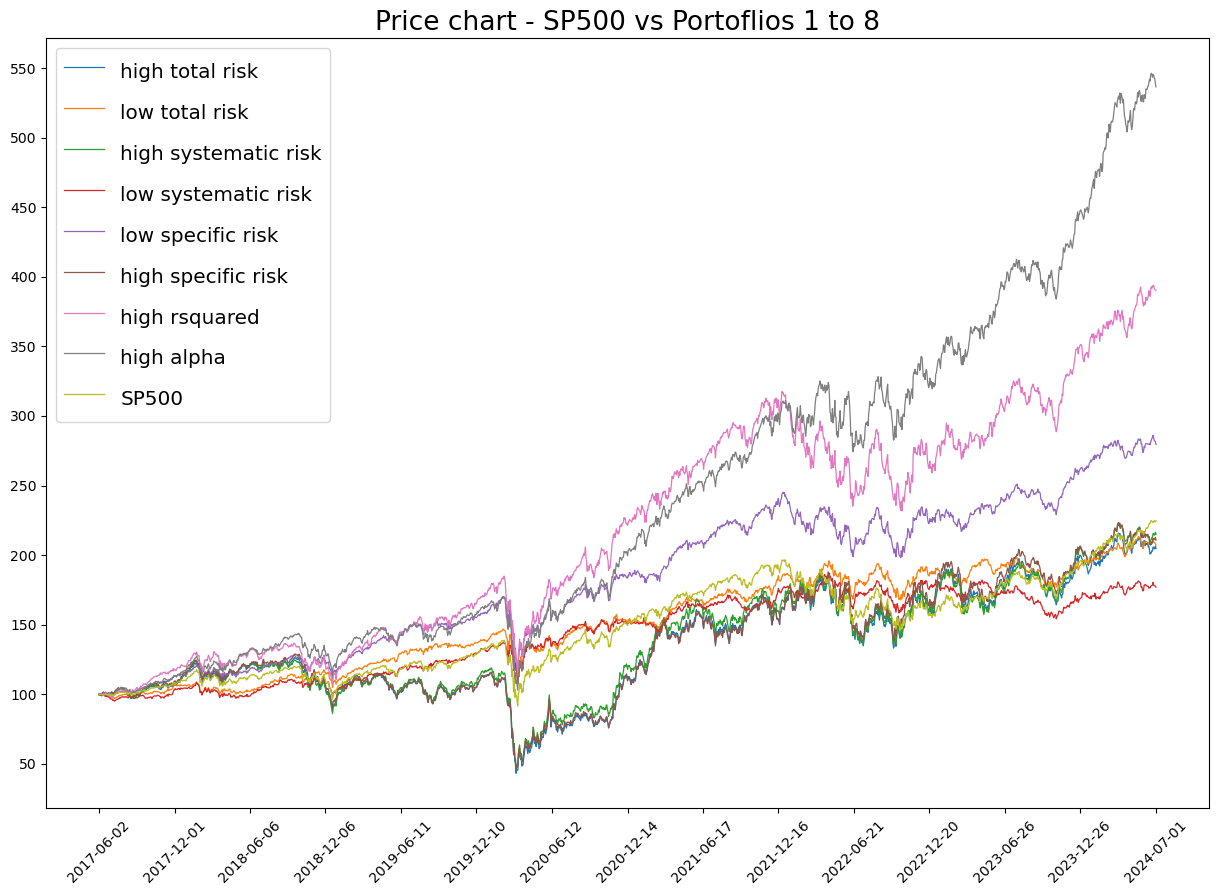

In [342]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(SP500['Date'], portfoliovalue_toptot, label='high total risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_lowtot, label='low total risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_topsyst, label='high systematic risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_lowsyst, label='low systematic risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_lowspec, label='low specific risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_topspec, label='high specific risk', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_rsquared, label='high rsquared', linewidth=0.9)
plt.plot(SP500['Date'], portfoliovalue_alpha, label='high alpha', linewidth=0.9)
plt.plot(SP500['Date'], SP500['Price']*100/SP500['Price'][1], label='SP500', linewidth=0.9)
plt.legend(fontsize='x-large', handlelength=2, handleheight=2)
plt.title('Price chart - SP500 vs Portoflios 1 to 8', fontsize=19)
plt.locator_params(axis='y', nbins=15)

num_ticks = 15
tick_positions = np.linspace(0, len(SP500['Date']) - 1, num=num_ticks, dtype=int)
plt.xticks(tick_positions, [SP500['Date'][i+1] for i in tick_positions], rotation=45)
plt.savefig('price_chart.png', dpi=600)

Now all that's left is to conlcude with a final comparative table of results and some statistics:

In [355]:
table_of_returns=pd.DataFrame(columns=['Portfolio','Total return(%)', 'Yearly average return(%)', 'Volatility', 'Sharpe', 'Max Downside', 'Sortino'])

In [356]:
table_of_returns['Portfolio']=['SP500_index', 'highest_rsquared', 'highest_alpha', 'low_systematic_risk', 
           'high_systematic_risk', 'low_specific_risk', 'high_specific_risk', 'low_total_risk', 
            'high_total_risk']

In [357]:
table_of_returns['Total return(%)']=[(SP500['Price'][len(SP500)-1]-SP500['Price'][1])*100/SP500['Price'][1], 
                                 (portfoliovalue_rsquared[-1]-portfoliovalue_rsquared[0])*100/portfoliovalue_rsquared[0], 
                                 (portfoliovalue_alpha[-1]-portfoliovalue_alpha[0])*100/portfoliovalue_alpha[0], 
                                 (portfoliovalue_lowsyst[-1]-portfoliovalue_lowsyst[0])*100/portfoliovalue_lowsyst[0], 
                                 (portfoliovalue_topsyst[-1]-portfoliovalue_topsyst[0])*100/portfoliovalue_topsyst[0], 
                                 (portfoliovalue_lowspec[-1]-portfoliovalue_lowspec[0])*100/portfoliovalue_lowspec[0],
                                 (portfoliovalue_topspec[-1]-portfoliovalue_topspec[0])*100/portfoliovalue_topspec[0],
                                 (portfoliovalue_lowtot[-1]-portfoliovalue_lowtot[0])*100/portfoliovalue_lowtot[0], 
                                 (portfoliovalue_toptot[-1]-portfoliovalue_toptot[0])*100/portfoliovalue_toptot[0]]

In [358]:
table_of_returns['Yearly average return(%)']=((1+table_of_returns['Total return(%)']/100)**(1/7)-1)*100

In [359]:
trading_days=252.0
table_of_returns['Volatility']=100*(trading_days ** 0.5)*np.array([np.std([(SP500['Price'][i]-SP500['Price'][i-1])/SP500['Price'][i-1] 
           for i in range(2,len(SP500))]), 
                                                        np.std([(portfoliovalue_rsquared[i]-portfoliovalue_rsquared[i-1])/portfoliovalue_rsquared[i-1] 
           for i in range(1, len(portfoliovalue_rsquared))]), 
                                                         np.std([(portfoliovalue_alpha[i]-portfoliovalue_alpha[i-1])/portfoliovalue_alpha[i-1] 
           for i in range(1, len(portfoliovalue_alpha))]), 
                                                         np.std([(portfoliovalue_lowsyst[i]-portfoliovalue_lowsyst[i-1])/portfoliovalue_lowsyst[i-1] 
           for i in range(1, len(portfoliovalue_lowsyst))]), 
                                                         np.std([(portfoliovalue_topsyst[i]-portfoliovalue_topsyst[i-1])/portfoliovalue_topsyst[i-1] 
           for i in range(1, len(portfoliovalue_topsyst))]), 
                                                         np.std([(portfoliovalue_lowspec[i]-portfoliovalue_lowspec[i-1])/portfoliovalue_lowspec[i-1] 
           for i in range(1, len(portfoliovalue_lowspec))]),
                                                         np.std([(portfoliovalue_topspec[i]-portfoliovalue_topspec[i-1])/portfoliovalue_topspec[i-1] 
           for i in range(1, len(portfoliovalue_topspec))]), 
                                                         np.std([(portfoliovalue_lowtot[i]-portfoliovalue_lowtot[i-1])/portfoliovalue_lowtot[i-1] 
           for i in range(1, len(portfoliovalue_lowtot))]), 
                                                         np.std([(portfoliovalue_toptot[i]-portfoliovalue_toptot[i-1])/portfoliovalue_toptot[i-1] 
           for i in range(1, len(portfoliovalue_toptot))])])

In [360]:
table_of_returns['Sharpe']=table_of_returns['Yearly average return(%)']/table_of_returns['Volatility']

For Sharpe and Sortino indicators we set risk free rate to 0 effectively

In [361]:
table_of_returns

,Portfolio,Total return(%),Yearly average return(%),Volatility,Sharpe,Max Downside,Sortino
0,SP500_index,123.875494,12.202087,19.324872,0.631419,NaN,NaN
1,highest_rsquared,288.456361,21.392470,23.724671,0.901697,NaN,NaN
2,highest_alpha,434.781705,27.064789,21.047313,1.285902,NaN,NaN
3,low_systematic_risk,76.508481,8.455661,14.462752,0.584651,NaN,NaN
4,high_systematic_risk,115.849395,11.618410,31.584752,0.367849,NaN,NaN
5,low_specific_risk,178.485683,15.755935,17.801558,0.885087,NaN,NaN
6,high_specific_risk,111.779250,11.315277,31.374767,0.360649,NaN,NaN
7,low_total_risk,106.236610,10.894344,15.160281,0.718611,NaN,NaN
8,high_total_risk,105.441891,10.833196,32.248686,0.335927,NaN,NaN


In [365]:
table_of_returns['Max Downside']=100*(trading_days ** 0.5)*np.array([np.sqrt(np.mean(
    [min(0, r)**2 for r in [(SP500['Price'][i]-SP500['Price'][i-1])/SP500['Price'][i-1] 
           for i in range(2,len(SP500))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_rsquared[i]-portfoliovalue_rsquared[i-1])/portfoliovalue_rsquared[i-1] 
           for i in range(1, len(portfoliovalue_rsquared))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_alpha[i]-portfoliovalue_alpha[i-1])/portfoliovalue_alpha[i-1] 
           for i in range(1, len(portfoliovalue_alpha))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_lowsyst[i]-portfoliovalue_lowsyst[i-1])/portfoliovalue_lowsyst[i-1] 
           for i in range(1, len(portfoliovalue_lowsyst))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_topsyst[i]-portfoliovalue_topsyst[i-1])/portfoliovalue_topsyst[i-1] 
           for i in range(1, len(portfoliovalue_topsyst))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_lowspec[i]-portfoliovalue_lowspec[i-1])/portfoliovalue_lowspec[i-1] 
           for i in range(1, len(portfoliovalue_lowspec))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_topspec[i]-portfoliovalue_topspec[i-1])/portfoliovalue_topspec[i-1] 
           for i in range(1, len(portfoliovalue_topspec))]])),
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_lowtot[i]-portfoliovalue_lowtot[i-1])/portfoliovalue_lowtot[i-1] 
           for i in range(1, len(portfoliovalue_lowtot))]])), 
                                                               np.sqrt(np.mean(
    [min(0, r)**2 for r in [(portfoliovalue_toptot[i]-portfoliovalue_toptot[i-1])/portfoliovalue_toptot[i-1] 
           for i in range(1, len(portfoliovalue_toptot))]]))])

In [367]:
table_of_returns['Sortino']=table_of_returns['Yearly average return(%)']/table_of_returns['Max Downside']

In [371]:
table_of_returns.sort_values(by='Sortino', ascending=False)

,Portfolio,Total return(%),Yearly average return(%),Volatility,Sharpe,Max Downside,Sortino
2,highest_alpha,434.781705,27.064789,21.047313,1.285902,14.901871,1.816201
1,highest_rsquared,288.456361,21.392470,23.724671,0.901697,16.542363,1.293193
5,low_specific_risk,178.485683,15.755935,17.801558,0.885087,12.529358,1.257521
7,low_total_risk,106.236610,10.894344,15.160281,0.718611,10.593524,1.028397
0,SP500_index,123.875494,12.202087,19.324872,0.631419,13.883671,0.878880
3,low_systematic_risk,76.508481,8.455661,14.462752,0.584651,9.988151,0.846569
4,high_systematic_risk,115.849395,11.618410,31.584752,0.367849,22.569641,0.514780
6,high_specific_risk,111.779250,11.315277,31.374767,0.360649,22.317296,0.507018
8,high_total_risk,105.441891,10.833196,32.248686,0.335927,22.965530,0.471715
